#Diabetes Classification using Support Vector Machines (SVM)

##Dataset:
The dataset contains information about individuals and their symptoms related to diabetes.
Features:
- Age: Age of the individual
- Gender: Gender of the individual
- Polyuria: Presence of Polyuria (excessive urination)
- Polydipsia: Presence of Polydipsia (excessive thirst)
- Sudden Weight Loss: Presence of sudden weight loss
- Weakness: Presence of weakness
- Polyphagia: Presence of Polyphagia (excessive hunger)
- Genital Thrush: Presence of genital thrush
- Visual Blurring: Presence of visual blurring
- Itching: Presence of itching
- Irritability: Presence of irritability
- Delayed Healing: Presence of delayed healing
- Partial Paresis: Presence of partial paresis
- Muscle Stiffness: Presence of muscle stiffness
- Alopecia: Presence of alopecia (hair loss)
- Obesity: Presence of obesity

Target Variable:
- Class: Diagnosis of diabetes (Positive/Negative)

##SVM Classification:
Support Vector Machines (SVM) is a powerful machine learning algorithm used for classification and regression tasks.
It works by finding the hyperplane that best separates the classes in the feature space.

##Code Description:
This Python script reads the diabetes dataset, preprocesses the data, performs SVM classification,
and evaluates the model's performance using the F1 score. The script also includes hyperparameter tuning
using GridSearchCV to find the best parameters for the SVM model.


In [42]:
# Import necessary libraries
import numpy as np  # NumPy for numerical operations
import matplotlib.pyplot as plt  # Matplotlib for plotting
import pandas as pd  # Pandas for data manipulation
from sklearn.metrics import f1_score  # F1 score for evaluating classification performance
from sklearn.model_selection import train_test_split  # Splitting data into training and testing sets
from sklearn import svm  # Support Vector Machine (SVM) for classification

from sklearn.preprocessing import StandardScaler  # Standardize features for SVM
from sklearn.metrics import ConfusionMatrixDisplay  # Display confusion matrix for model evaluation

In [43]:
# Read the CSV file 'diabetes_data_upload.csv' into a Pandas DataFrame
data_df = pd.read_csv('/content/drive/MyDrive/diabetes_data_upload.csv')

# Display the first few rows of the DataFrame to get an overview of the data
data_df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [44]:
# Replace 'Male', 'Yes', and 'Positive' with 1 in the DataFrame
data_df = data_df.replace(['Male', 'Yes', 'Positive'], 1)

# Replace 'Female', 'No', and 'Negative' with 0 in the DataFrame
data_df = data_df.replace(['Female', 'No', 'Negative'], 0)

# Display the first few rows of the DataFrame after the replacement
data_df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [45]:
# Create a StandardScaler object
scaler = StandardScaler()

# Standardize the 'Age' column in the DataFrame using the fit_transform method
data_df[['Age']] = scaler.fit_transform(data_df[['Age']])

In [46]:
# Perform train-test split on the dataset
X_train, X_test, y_train, y_test = train_test_split(data_df.iloc[:,:-1], data_df.iloc[:,-1], test_size=int(data_df.shape[0]*0.1), train_size=int(data_df.shape[0]*0.9), random_state=1)

In [47]:
# List of SVM kernel types to be tested
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Iterate over each kernel type
for kernel in kernels:
    # Create an SVM classifier with the specified kernel
    clf = svm.SVC(kernel=kernel)

    # Train the classifier on the training set
    clf.fit(X_train, y_train)

    # Print the accuracy score on the test set for the current kernel
    accuracy_score = np.round(clf.score(X_test, y_test), 2)
    print(f"{kernel} Accuracy Score: {accuracy_score}")

linear Accuracy Score: 0.88
poly Accuracy Score: 0.9
rbf Accuracy Score: 0.92
sigmoid Accuracy Score: 0.67


F1 score: 0.93


<Figure size 1000x800 with 0 Axes>

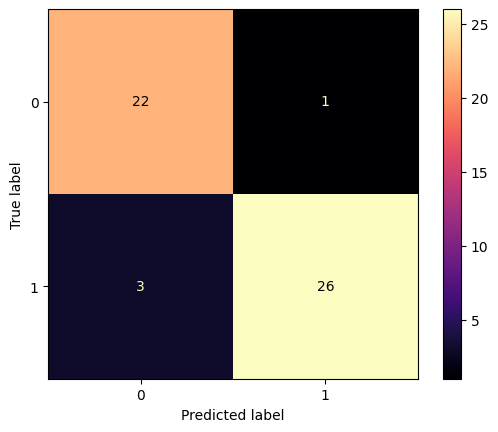

In [48]:
# Create an SVM classifier using scikit-learn's SVC
clf = svm.SVC()

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Make predictions on the test set
y_hat = clf.predict(X_test)

# Calculate and print the F1 score
f1 = np.round(f1_score(y_test, y_hat), 2)
print("F1 score:", f1)

# Display the confusion matrix
plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap='magma')
plt.show()

In [49]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001]}

# Create an SVM model
svm_model = clf

# Create GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='f1', n_jobs=-1)

# Perform GridSearchCV on the training data
grid_search.fit(X_train, y_train.values)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best SVM model
best_svm_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_svm_model.predict(X_test)

# Calculate and print the F1 score
f1 = np.round(f1_score(y_test.values, y_pred), 2)
print("F1 score:", f1)

Best Parameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
F1 score: 0.95


**Conclusion:**

The SVM model, configured with a radial basis function (RBF) kernel and hyperparameters C=100 and gamma=1, demonstrates strong performance on the given dataset. The F1 score of 0.95 indicates that the model is effective in capturing the underlying patterns in the data and making accurate predictions. This suggests that the selected hyperparameters and kernel choice contribute to a well-generalized model.

It's important to note that the success of the SVM model depends on the specific characteristics of the dataset and the problem at hand. Further analysis, such as examining additional evaluation metrics, exploring feature importance, and considering the implications of false positives/negatives,provides a more comprehensive understanding of the model's performance and its suitability for the intended application. Additionally, assessing the model on diverse datasets or using cross-validation helps validate its robustness.